# **4. Numerical algorithms**
넘파이의 난수 생성, 히스토그램, Power 방법, 선형 대수

# Rnadom Numbers

In [ ]:
import numpy.random as rng
import numpy as np

In [ ]:
print(rng.rand(3), '\n')
print(rng.rand(2, 3))

[0.51459892 0.9912055  0.66939165] 

[[0.81717592 0.50425144 0.7853056 ]
 [0.20790404 0.34281606 0.57237962]]


In [ ]:
print(rng.randn(5),'\n')
print(rng.randn(2, 2))

[-0.09878977 -1.66192084  0.22090958  1.42301135 -0.77856768] 

[[ 0.92914593 -0.98287819]
 [-1.86176798 -0.48043133]]


In [ ]:
print(rng.randint(0, 10, size = 5), '\n')
print(rng.randint(100, 200, size =(3,2)))

[4 6 0 3 1] 

[[110 186]
 [159 176]
 [176 144]]


In [ ]:
a = ['사과', '딸기', '수박']
print(rng.choice(a, size = 3))
print(rng.choice(a, size = 3, replace=False))
print(rng.choice(a, size = 5, p=[0.1, 0.3, 0.6]))

['수박' '수박' '사과']
['딸기' '사과' '수박']
['딸기' '수박' '딸기' '수박' '딸기']


In [ ]:
# rng.shuffle()은 원본이 수정됨
arr = np.arange(10)
rng.shuffle(arr)
print(arr)

[2 9 7 8 0 5 1 6 3 4]


In [ ]:
# rng.permutation은 원본을 보존하고 섞기
arr = np.arange(10)
shuffled = rng.permutation(arr)
print(arr, '\n')
print(shuffled)

[0 1 2 3 4 5 6 7 8 9] 

[8 4 0 7 9 3 2 5 6 1]


# Histograms

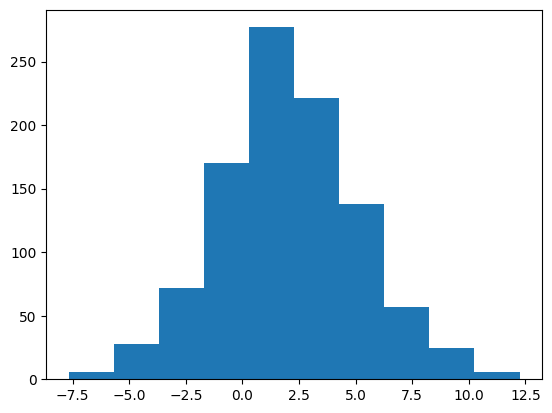

In [ ]:
import matplotlib.pyplot as plt

# 평균 2, 표준편차 3 -> 정규분포 샘플 1000개
x1 = rng.normal(2, 3, 1000)

# 평균 1, 표준편차 5 -> 더 퍼진형태의 정규분포 샘플 1000개
x2 = rng.normal(1, 5, 1000)
plt.hist(x1);

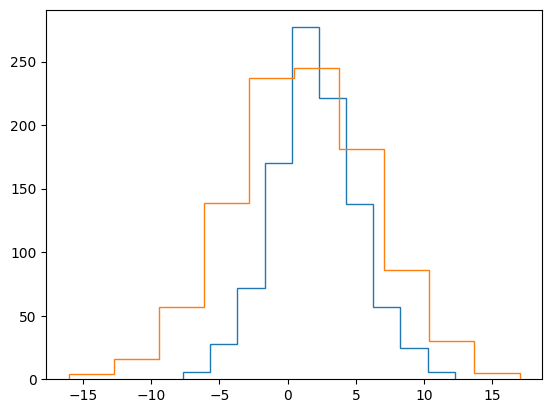

In [ ]:
# 선 스타일의 히스토그램
plt.hist(x1, histtype='step');
plt.hist(x2, histtype='step');

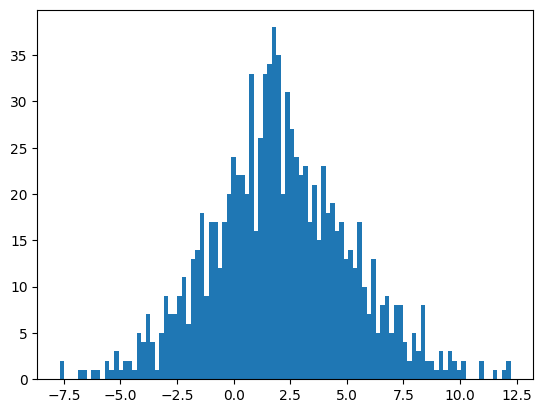

In [ ]:
# 막대의 개수를 100개로 늘려 더 세밀한 분포 시각화
plt.hist(x1, bins=100);

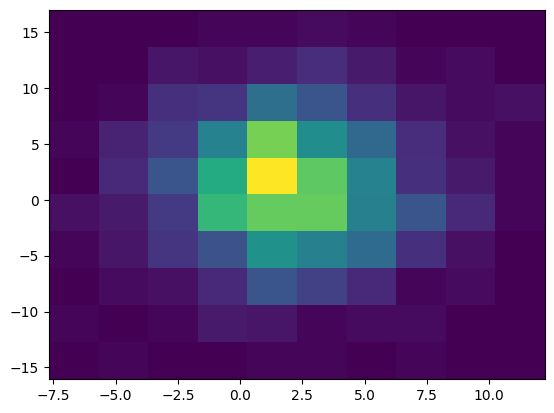

In [ ]:
# 2D로 샘플 쌍의 분포 시각화
plt.hist2d(x1, x2);

# Power method

선형대수 알고리즘을 numpy로 구현해본다.

numpy의 정확한 고유값 계산 함수인 np.linalg.eigh와 비교해본다.

In [ ]:
'''
1. 대칭 행렬 A를 무작위로 생성
2. 그 행렬에 대해 Power method로 가장 큰 고유값/고유벡터를 구한다.
3. 그리고 numpy.linalg.eigh 함수 결가와 비교한다.

입력 : A (nxn 대칭 행렬)
출력 : 가장 큰 절대값의 고유값 λ, 해당 고유벡터 v

v <- 길이 n의 무작위 벡터
반복문 :
  v <- A x v
  v <- v / ||v||_2
  λ <- v^T A v
수렴할 때까지 반복
'''

In [ ]:
# 지속적인 이해 필요 이해 부족함
import numpy as np

def power_method(A, num_iters = 1000, tol = 1e-10):
  n = A.shape[0]
  v = np.random.rand(n)
  v = v / np.linalg.norm(v)

  last_lambda = 0
  for i in range(num_iters):
    v = A @ v
    v = v / np.linalg.norm(v)
    lambda_ = v @ A @ v
    if np.abs(lambda_ - last_lambda) < tol:
      break
    last_lambda = lambda_

  return lambda_, v

In [ ]:
np.random.seed(0)

B = np.random.randn(5, 5)
A = (B + B.T) / 2

lambda_pm, v_pm = power_method(A)

eigvlas, eigvecs = np.linalg.eigh(A)

print(lambda_pm)
print(v_pm)
print()
print(eigvlas[-1])
print(eigvecs[:, -1])

3.180345674781052
[-0.52329698  0.15126032  0.12246162 -0.40203883  0.72570553]

3.1803456749207526
[-0.52330514  0.15125488  0.12245471 -0.40204311  0.72569958]


# Linear Algebra in Numpy

In [ ]:
import numpy.linalg as la

* `la.eye(3)`, 단위 행렬 생성
* `la.trace(A)`, 대각합
* `la.column_stack((A,B))`, A와 B를 열 방향으로 붙임
* `la.row_stack((A,B,A))`, A와 B를 행 방향으로 붙임
* `la.qr`, QR 분해 (정사각 행렬 = 직교 Q x 상삼각 R)
* `la.cholesky`, 조르스키 분해
* `la.inv(A)`, 역행렬
* `la.solve(A,b)`, 연립방정식 $Ax = b$ 의 해를 구함
* `la.lstsq(A,b)`, 최소제곱 해 $\arg\min_x \|Ax-b\|_2$
* `la.eig(A)`, 고유값 분해
* `la.eigh(A)`, 대칭행렬 고유값 분해(더 빠르고 정확함)
* `la.eigvals(A)`, 고유 값만 계산
* `la.svd(A, full)`, Singular value decomposition
* `la.pinv(A)`, 수도역행렬 계산

In [ ]:
# Singular Value Decomposition 계산
A = np.random.normal(0, 1, (2,3))
U, S, V = la.svd(A)
print("A  = \n", A)
print("U = \n", U)
print("S = \n", S)
print("V = \n", V)

A  = 
 [[-1.45436567 -1.078278    1.39547227]
 [ 1.78748405 -0.56951726  0.17538653]]
U = 
 [[-0.84662096  0.53219635]
 [ 0.53219635  0.84662096]]
S = 
 [2.51386171 1.56713583]
V = 
 [[ 0.86822156  0.2425741  -0.43283845]
 [ 0.47176087 -0.67385408  0.5686496 ]
 [ 0.15373029  0.69791009  0.69949161]]


In [ ]:
# solve는 연립방정식의 해를 구함
A = np.arange(0, 4, 1.0).reshape(2,2)
x = np.array([1.0,2.0])
b = A@x

x2 = la.solve(A,b)

print("A = \n",A)
print("x = \n", x)
print("b = \n", b)
print("x2 = \n", x2)

A = 
 [[0. 1.]
 [2. 3.]]
x = 
 [1. 2.]
b = 
 [2. 8.]
x2 = 
 [1. 2.]
